# Lab: SVD and PCA Analysis -- Layth Aljorani

In [2]:
import numpy as np

## 1. SVD and PCA basics

### setup

SVD factorization leads to A = U * sigma * V^T . 

For i = 1, . . . , N , the i-th column of V is a unit vector that
defines the i-th principle component.

In [5]:
A = np.array([[17, 24, 1, 8, 15],
              [23, 5, 7, 14, 16],
              [4, 6, 13, 20, 22],
              [10, 12, 19, 21, 3],
              [11, 18, 25, 2, 9]])
A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

### Exercise 1: 

Use numpy to perform singular value decomposition (SVD) and principal component
analysis (PCA). (matrix is centered around zero)

1. Use X, s, Y = np.linalg.svd(A) to perform SVD analysis.

In [8]:
X, s, Y = np.linalg.svd(A)

2. Calculate and print the variance explained by the i-th component, i.e.,

In [10]:
var = (s ** 2) / np.sum(s ** 2)
var

array([0.76470588, 0.09201289, 0.08513021, 0.03251685, 0.02563417])

In [11]:
# same things as above
summ = np.sum(s ** 2)
variance = []
for i in s:
    tmp = (i ** 2) / summ
    variance.append(tmp)
variance

[0.764705882352941,
 0.09201288836360606,
 0.0851302114999976,
 0.03251684732353188,
 0.025634170459923528]

3. To verify the factorization is correct, use X, s, Y to recover matrix A (let’s denote the recovered
matrix as B). Is Y = V or Y = V T ?


Answer: Y is equal to V.T

In [13]:
s

array([65.        , 22.54708869, 21.68742536, 13.403566  , 11.90078954])

In [14]:
np.diag(s)

array([[65.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 22.54708869,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 21.68742536,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 13.403566  ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 11.90078954]])

In [15]:
B = X @ np.diag(s) @ Y
B

array([[17., 24.,  1.,  8., 15.],
       [23.,  5.,  7., 14., 16.],
       [ 4.,  6., 13., 20., 22.],
       [10., 12., 19., 21.,  3.],
       [11., 18., 25.,  2.,  9.]])

4. Use np.linalg.norm to calculate the difference of matrices A and B.


In [17]:
A - B

array([[-3.55271368e-15,  1.06581410e-14,  1.93178806e-14,
        -2.48689958e-14, -1.59872116e-14],
       [ 0.00000000e+00,  1.77635684e-14,  1.33226763e-14,
        -2.66453526e-14, -1.42108547e-14],
       [ 5.77315973e-15, -5.32907052e-15, -1.77635684e-14,
        -1.06581410e-14, -7.10542736e-15],
       [ 3.55271368e-15, -3.19744231e-14, -1.42108547e-14,
         1.77635684e-14,  6.66133815e-15],
       [-5.32907052e-15, -3.55271368e-14, -1.42108547e-14,
         2.17603713e-14,  1.95399252e-14]])

In [18]:
np.linalg.norm(A - B)

8.523187293941492e-14

5. Define W as the matrix containing the first 2 columns of V , which defines a plane formed by the
first 2 principal components.

Answer: Y = V.T ==> V = Y.T

In [20]:
V = Y.T
V

array([[-4.47213595e-01, -4.04516436e-01,  2.46564896e-01,
        -6.62726001e-01,  3.69278287e-01],
       [-4.47213595e-01, -5.56615971e-03,  6.62726001e-01,
         2.46564896e-01, -5.47694274e-01],
       [-4.47213595e-01,  8.20165192e-01, -3.22455040e-14,
        -3.69575263e-17,  3.56831975e-01],
       [-4.47213595e-01, -5.56615971e-03, -6.62726001e-01,
        -2.46564896e-01, -5.47694274e-01],
       [-4.47213595e-01, -4.04516436e-01, -2.46564896e-01,
         6.62726001e-01,  3.69278287e-01]])

In [21]:
W = V[:,:2]
W

array([[-0.4472136 , -0.40451644],
       [-0.4472136 , -0.00556616],
       [-0.4472136 ,  0.82016519],
       [-0.4472136 , -0.00556616],
       [-0.4472136 , -0.40451644]])

6. Project the matrix A to the new plane by perform the dot product of A and W , denoted the
reduced matrix as Ar

In [23]:
Ar = np.dot(A, W)
Ar

array([[-2.90688837e+01, -1.23024779e+01],
       [-2.90688837e+01, -1.01407417e+01],
       [-2.90688837e+01, -5.29465360e-13],
       [-2.90688837e+01,  1.01407417e+01],
       [-2.90688837e+01,  1.23024779e+01]])

### Exercise 2: Use Scikit-Learn to perform PCA analysis in Exercise 1.

(this matrix will be centered around the mean)

1. Load library: from sklearn.decomposition import PCA.

In [26]:
from sklearn.decomposition import PCA

2. Initialize a PCA model with 2 components.

In [28]:
model = PCA(n_components=2)

3. Use Model.fit(A) to fit the model.

In [30]:
model.fit(A)

PCA(n_components=2)

In [31]:
print(f"components: {model.components_}")
print(f"explained variance: {model.explained_variance_}")
print(f"explained variance ratio: {model.explained_variance_ratio_}")
print(f"n components: {model.n_components_}")
print(f"n samples: {model.n_samples_}")
print(f"n features in: {model.n_features_in_}")

components: [[ 4.04516436e-01  5.56615971e-03 -8.20165192e-01  5.56615971e-03
   4.04516436e-01]
 [-2.46564896e-01 -6.62726001e-01 -3.54216581e-15  6.62726001e-01
   2.46564896e-01]]
explained variance: [127.09280205 117.58610463]
explained variance ratio: [0.39105478 0.3618034 ]
n components: 2
n samples: 5
n features in: 5


4. Use Model.transform(A) to transform reduce the dimension of matrix A.

In [33]:
model.transform(A)

array([[ 1.23024779e+01, -1.10967458e+01],
       [ 1.01407417e+01,  4.23857973e+00],
       [-6.25055563e-14,  1.37163321e+01],
       [-1.01407417e+01,  4.23857973e+00],
       [-1.23024779e+01, -1.10967458e+01]])

5. Print the percentage of variance explained by each of the selected components.

In [35]:
print(f"explained variance ratio: {model.explained_variance_ratio_} per component")
print(f"total variance explained by all components {sum(model.explained_variance_ratio_)}")

explained variance ratio: [0.39105478 0.3618034 ] per component
total variance explained by all components 0.7528581744203147


6. Compare the reduced matrix here with that obtained in Exercise 1. What is your observation?

Answer: they are not the same

7. If 80% of information, how many components should we use?

In [38]:
model2 = PCA(n_components=3)
model2.fit(A)
print(f"explained variance ratio: {model2.explained_variance_ratio_} per component")
print(f"total variance explained by all components {sum(model2.explained_variance_ratio_)}")

explained variance ratio: [0.39105478 0.3618034  0.1381966 ] per component
total variance explained by all components 0.8910547755453252


### Exercise 3: Revisit Exercise 1

1. Center the data by performing A_centered = A_i - mean(A) 

In [41]:
A_centered_around_mean = A - np.mean(A)
A_centered_around_mean

array([[  4.,  11., -12.,  -5.,   2.],
       [ 10.,  -8.,  -6.,   1.,   3.],
       [ -9.,  -7.,   0.,   7.,   9.],
       [ -3.,  -1.,   6.,   8., -10.],
       [ -2.,   5.,  12., -11.,  -4.]])

2. Repeat the tasks in Exercise 1 for A center , and compare the reduced matrix here with that obtained in Exercise 2

In [43]:
Xc, sc, Yc = np.linalg.svd(A_centered_around_mean) # c = centered
var = (sc ** 2) / np.sum(sc ** 2)
var

array([3.91054776e-01, 3.61803399e-01, 1.38196601e-01, 1.08945224e-01,
       4.85090051e-34])

In [44]:
Bc = Xc @ np.diag(sc) @ Yc
Bc

array([[ 4.00000000e+00,  1.10000000e+01, -1.20000000e+01,
        -5.00000000e+00,  2.00000000e+00],
       [ 1.00000000e+01, -8.00000000e+00, -6.00000000e+00,
         1.00000000e+00,  3.00000000e+00],
       [-9.00000000e+00, -7.00000000e+00,  4.46161833e-15,
         7.00000000e+00,  9.00000000e+00],
       [-3.00000000e+00, -1.00000000e+00,  6.00000000e+00,
         8.00000000e+00, -1.00000000e+01],
       [-2.00000000e+00,  5.00000000e+00,  1.20000000e+01,
        -1.10000000e+01, -4.00000000e+00]])

In [45]:
Vc = Yc.T
Wc = Vc[:,:2]
A_centered_around_mean_reduced = np.dot(A_centered_around_mean, Wc)
A_centered_around_mean_reduced

array([[-1.23024779e+01,  1.10967458e+01],
       [-1.01407417e+01, -4.23857973e+00],
       [ 6.25055563e-14, -1.37163321e+01],
       [ 1.01407417e+01, -4.23857973e+00],
       [ 1.23024779e+01,  1.10967458e+01]])

The matrix is the same as the one obtained in exercise 2 value-wise but complementary sign-wise which is fine. it is due to picking different pos and negative axes

## 2. SVD and PCA for image compression

### setup

Load the picture “swim.jpg” from Homework 4, and define the data as “image”. It is a RGB color image.
Split the three colors, e.g.

red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

In [50]:
import imageio
import matplotlib.pyplot as plt

(1200, 1600, 3)


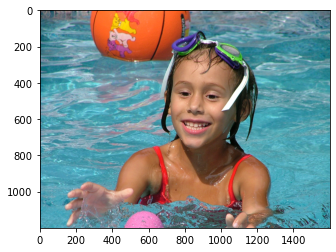

In [51]:
image = imageio.imread("./swim.jpg") # W x H x D (where D is 3)
print(f"{np.shape(image)}")
plt.imshow(image)
plt.show()

In [52]:
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

red

Array([[ 90, 106, 116, ...,  89,  94,  99],
       [ 93, 107, 117, ...,  84,  86,  86],
       [ 95, 107, 117, ...,  77,  76,  76],
       ...,
       [ 57,  61,  63, ...,  88,  94,  87],
       [ 60,  61,  62, ...,  72, 101,  87],
       [ 58,  57,  58, ...,  58,  83,  94]], dtype=uint8)

### Exercise 4: Use SVD to perform image compression.

1. For each color,

* (a) Perform SVD, e.g., Ur, sr, VrT = np.linalg.svd(red).
* (b) Compute the k-rank approximation, e.g.,

In [55]:
# Compressed color matrices
k = 20

Ur, sr, VTr = np.linalg.svd(red) # r = red, T = Transpose
Ug, sg, VTg = np.linalg.svd(green) # r = green, T = Transpose
Ub, sb, VTb = np.linalg.svd(blue) # b = blue, T = Transpose

comp_red = 0
comp_green = 0
comp_blue = 0
for j in range(k): # k-rank approximation
    comp_red += sr[j] * np.outer(Ur[:,j], VTr.T[:,j])
    comp_green += sg[j] * np.outer(Ug[:,j], VTg.T[:,j])
    comp_blue += sb[j] * np.outer(Ub[:,j], VTb.T[:,j])

print(f"shape: {np.shape(comp_red)}")
print(f"shape: {np.shape(comp_green)}")
print(f"shape: {np.shape(comp_blue)}")

shape: (1200, 1600)
shape: (1200, 1600)
shape: (1200, 1600)


2. Make a plot with 2 ⇥ 3 subplots. The first row shows the original image of each color, while the second row shows the corresponding compressed image with k = 20.

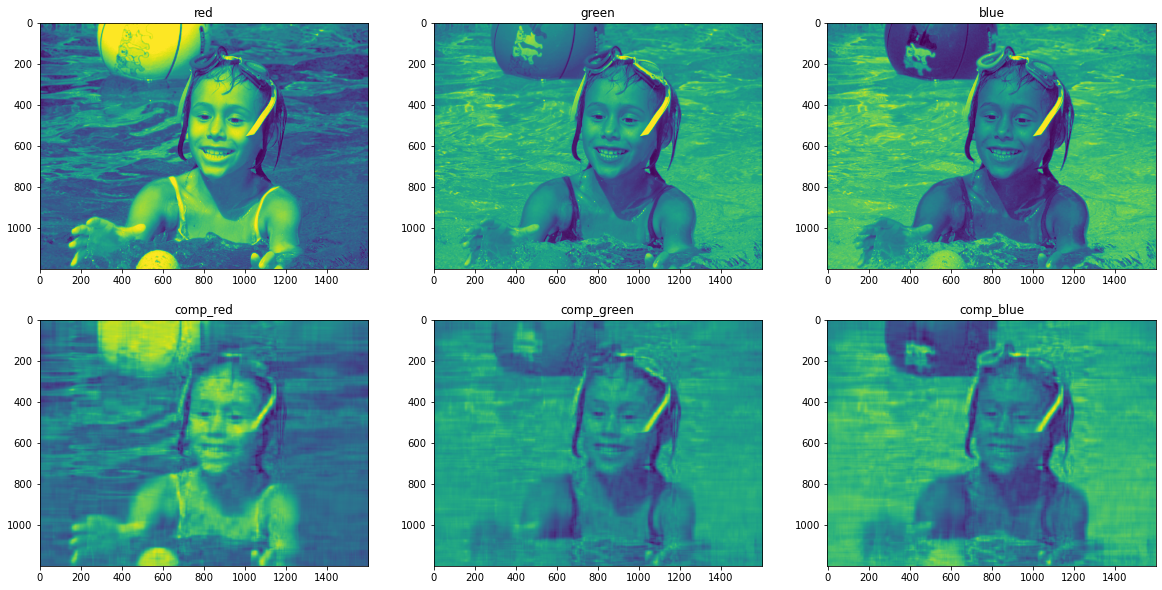

In [57]:
fix, axes = plt.subplots(2, 3, figsize=(20,10))

axes[0,0].set_title("red")
axes[0,0].imshow(red)
axes[0,1].set_title("green")
axes[0,1].imshow(green)
axes[0,2].set_title("blue")
axes[0,2].imshow(blue)

axes[1,0].set_title("comp_red")
axes[1,0].imshow(comp_red)
axes[1,1].set_title("comp_green")
axes[1,1].imshow(comp_green)
axes[1,2].set_title("comp_blue")
axes[1,2].imshow(comp_blue)

plt.show()

3. Combine three compressed image into a RGB image. Make a plot with 2 ⇥ 1 subplots to compare the compressed image with the original one.

In [59]:
# keeping both versions as a constructive example
new_comp_image1 = np.zeros((1200,1600,3), np.uint8) # uses 0..255
new_comp_image2 = np.zeros((1200,1600,3)) # gets divided bt 255, thus uses 0...1 float values (similar to using np.float64)

new_comp_image1[:,:,0] = comp_red
new_comp_image1[:,:,1] = comp_green
new_comp_image1[:,:,2] = comp_blue

new_comp_image2[:,:,0] = comp_red
new_comp_image2[:,:,1] = comp_green
new_comp_image2[:,:,2] = comp_blue

# np.stack((comp_red, comp_green, comp_blue), axis=-1) # axis = -1 because we are inputting back into the 3rd dim

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


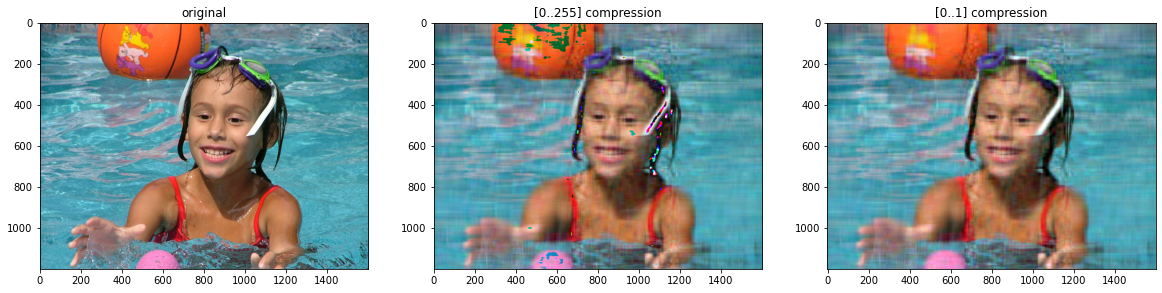

In [60]:
fix, axes = plt.subplots(1, 3, figsize=(20,10))

axes[0].set_title("original")
axes[0].imshow(image)

axes[1].set_title("[0..255] compression")
axes[1].imshow(new_comp_image1)

axes[2].set_title("[0..1] compression")
axes[2].imshow(new_comp_image2/255)

plt.show()

[0..255] creats more jumps in RGB data
while
[0..1] is more continuous

In [62]:
new_comp_image1[:,:,0]

array([[90, 90, 89, ..., 76, 76, 76],
       [91, 91, 90, ..., 76, 77, 77],
       [91, 91, 91, ..., 77, 78, 78],
       ...,
       [63, 65, 65, ..., 62, 61, 59],
       [64, 65, 65, ..., 59, 59, 57],
       [64, 65, 65, ..., 57, 57, 55]], dtype=uint8)

In [63]:
new_comp_image2[:,:,0]/255

array([[0.35465665, 0.35431185, 0.35246822, ..., 0.29921647, 0.3005075 ,
        0.30114719],
       [0.35736373, 0.35716577, 0.35548999, ..., 0.30110658, 0.30255269,
        0.30311513],
       [0.35934212, 0.35934207, 0.35779764, ..., 0.30583563, 0.30729739,
        0.30760134],
       ...,
       [0.25056304, 0.25558621, 0.25638659, ..., 0.24450831, 0.24251457,
        0.23424918],
       [0.25132471, 0.25639013, 0.25750143, ..., 0.23527269, 0.23352885,
        0.22547061],
       [0.25250537, 0.25767154, 0.25879431, ..., 0.22708176, 0.22543199,
        0.21730521]])

### Exercise 5: Use PCA to perform image compression.

1. For each color,

(a) Perform PCA, e.g.,

- pcar = PCA(n components = 10)
- reduced red = pcar.fit transform(red)

It reduces the original dimension to, e.g. 10, dimensions.

(b) Use pcar.inverse transform(reduced red) to decompress it back to original dimensions.

In [66]:
from sklearn.decomposition import PCA

In [67]:
k = 10

# Red
PCAr = PCA(n_components = k)
reduced_red = PCAr.fit_transform(red)
reduced_red = PCAr.inverse_transform(reduced_red)

# Green
PCAg = PCA(n_components = k)
reduced_green = PCAg.fit_transform(green)
reduced_green = PCAg.inverse_transform(reduced_green)

# Blue
PCAb = PCA(n_components = k)
reduced_blue = PCAb.fit_transform(blue)
reduced_blue = PCAb.inverse_transform(reduced_blue)

2. Make a plot with 2 ⇥ 3 subplots. The first row shows the original image of each color, while the second row shows the corresponding reduced(i.e., compressed) image with 20 components.

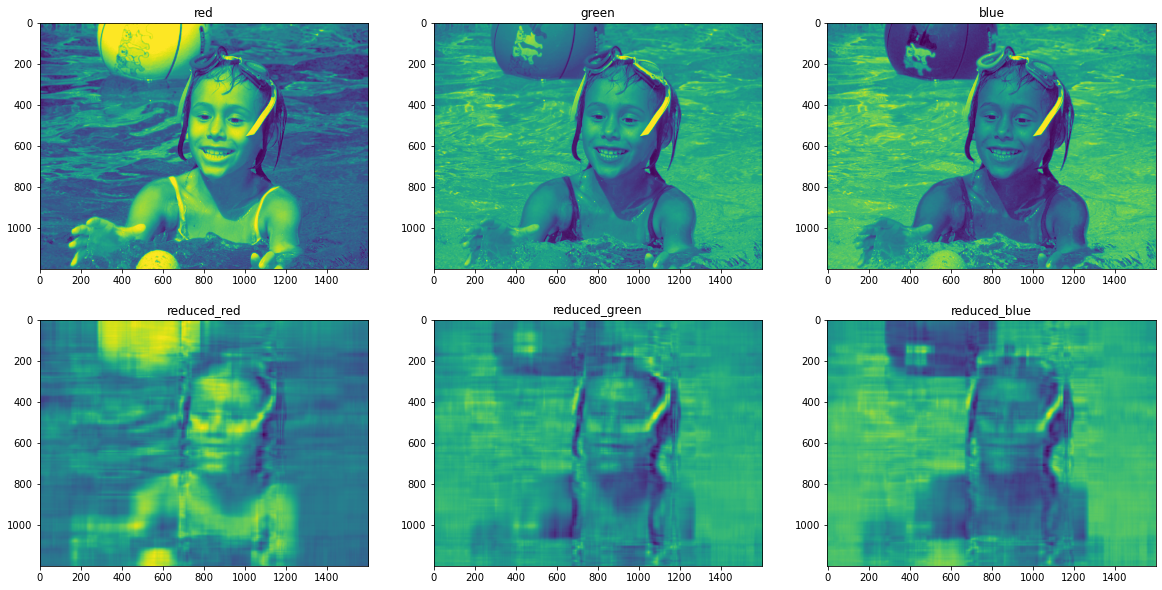

In [69]:
fix, axes = plt.subplots(2, 3, figsize=(20,10))

axes[0,0].set_title("red")
axes[0,0].imshow(red)
axes[0,1].set_title("green")
axes[0,1].imshow(green)
axes[0,2].set_title("blue")
axes[0,2].imshow(blue)

axes[1,0].set_title("reduced_red")
axes[1,0].imshow(reduced_red)
axes[1,1].set_title("reduced_green")
axes[1,1].imshow(reduced_green)
axes[1,2].set_title("reduced_blue")
axes[1,2].imshow(reduced_blue)

plt.show()

3. Combine three compressed image into a RGB image. Make a plot with 2 ⇥ 1 subplots to compare the compressed image with the original one.

In [71]:
# keeping both versions as a constructive example
new_reduced_image = np.zeros((1200,1600,3))

new_reduced_image[:,:,0] = reduced_red
new_reduced_image[:,:,1] = reduced_green
new_reduced_image[:,:,2] = reduced_blue

# np.stack((reduced_red, reduced_green, reduced_blue), axis=-1) # axis = -1 because we are inputting back into the 3rd dim

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


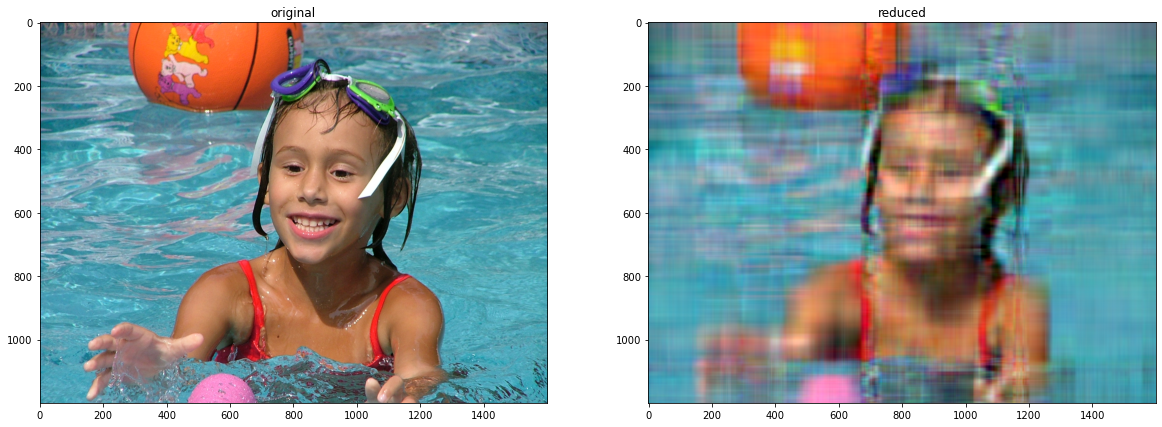

In [72]:
fix, axes = plt.subplots(1, 2, figsize=(20,10))

axes[0].set_title("original")
axes[0].imshow(image)

axes[1].set_title("reduced")

#normalize_reduced_image = new_reduced_image / np.max(new_reduced_image)
#clipped_reduced_image = np.clip(new_reduced_image/255, 0., 1.)
axes[1].imshow(new_reduced_image/255)

plt.show()

## 3. PCA for dimensionality reduction

### Exercise 6: Consider the data diagnosis.csv for cancer diagnosis.

1. Use Scikit-Learn to perform PCA analysis for the features of data, and reduce the data to two dimensions.

In [76]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [77]:
cancer_data = pd.read_csv("diagnosis.csv", delimiter=",", header=0).drop('Unnamed: 32',axis=1)
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [78]:
# Encoding categorical column 
label_encoder = LabelEncoder()
label_encoder.fit(cancer_data["diagnosis"])
cancer_data['diagnosis'] = label_encoder.transform(cancer_data['diagnosis'])

X = cancer_data.iloc[:,2:] # features, avoiding the id and diagnosis columns
y = cancer_data["diagnosis"] # labels

In [79]:
k = 2

PCA_cancer = PCA(n_components = k)
reduced_cancer_data = PCA_cancer.fit_transform(X)
reduced_cancer_data

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [80]:
print("shape of reduced data: ", np.shape(reduced_cancer_data))

shape of reduced data:  (569, 2)


2. What is the total percentage of variance explained by this reduced data?


In [82]:
print(f"explained variance ratio: {PCA_cancer.explained_variance_ratio_} per component")
print(f"total variance explained by the components above: {sum(PCA_cancer.explained_variance_ratio_)}")

explained variance ratio: [0.98204467 0.01617649] per component
total variance explained by the components above: 0.9982211613741724


3. Use the reduced data to perform the logistic regression (split 25% data as test data with random state=20).


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(reduced_cancer_data, y, test_size=0.25, shuffle=True, random_state=20)
model = LogisticRegression()
model.fit(x_train, y_train)

print("trained model parameters are:")
print(model.coef_, model.intercept_)

trained model parameters are:
[[ 0.01286424 -0.03663826]] [1.22540627]


4. Print out the in-sample and out-sample confusing matrix and accuracy.

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [88]:
ypred_train        = model.predict(x_train)
accuracy_train     = accuracy_score(y_train, ypred_train)
conf_matrix_train  = confusion_matrix(y_train, ypred_train)
print('Accuracy for training data (R^2): ', accuracy_train, '\n')
print('Confusion matrix for training data:\n', conf_matrix_train, '\n')

ypred_test         = model.predict(x_test)
accuracy_test      = accuracy_score(y_test,ypred_test)
conf_matrix_test   = confusion_matrix(y_test, ypred_test)
print('Accuracy for test data (R^2): ', accuracy_test, '\n')
print('Confusion matrix for test data:\n', conf_matrix_test, '\n')

Accuracy for training data (R^2):  0.9295774647887324 

Confusion matrix for training data:
 [[261  10]
 [ 20 135]] 

Accuracy for test data (R^2):  0.9370629370629371 

Confusion matrix for test data:
 [[84  2]
 [ 7 50]] 



### Exercise 7: Revisit Exercise 6. Normalize the reduced data before performing the logistic regression.

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler().fit(reduced_cancer_data)
reduced_normalized_data = scaler.transform(reduced_cancer_data)
print(np.shape(reduced_normalized_data))
reduced_normalized_data

(569, 2)


array([[0.42772682, 0.267593  ],
       [0.4507654 , 0.48695099],
       [0.39298315, 0.50362286],
       ...,
       [0.24895651, 0.50957316],
       [0.42026761, 0.50006016],
       [0.01936754, 0.41305874]])

In [92]:
x_train, x_test, y_train, y_test = train_test_split(reduced_normalized_data, y, test_size=0.25, shuffle=True, random_state=20)
norm_model = LogisticRegression()
norm_model.fit(x_train, y_train)

print("trained model parameters are:")
print(norm_model.coef_, norm_model.intercept_)

trained model parameters are:
[[ 8.1668785 -0.526361 ]] [-1.79846019]


In [93]:
ypred_train        = norm_model.predict(x_train)
accuracy_train     = accuracy_score(y_train, ypred_train)
conf_matrix_train  = confusion_matrix(y_train, ypred_train)
print('Accuracy for training data (R^2): ', accuracy_train, '\n')
print('Confusion matrix for training data:\n', conf_matrix_train, '\n')

ypred_test         = norm_model.predict(x_test)
accuracy_test      = accuracy_score(y_test,ypred_test)
conf_matrix_test   = confusion_matrix(y_test, ypred_test)
print('Accuracy for test data (R^2): ', accuracy_test, '\n')
print('Confusion matrix for test data:\n', conf_matrix_test, '\n')

Accuracy for training data (R^2):  0.8568075117370892 

Confusion matrix for training data:
 [[270   1]
 [ 60  95]] 

Accuracy for test data (R^2):  0.8601398601398601 

Confusion matrix for test data:
 [[86  0]
 [20 37]] 



In [ ]:
We can see that the results are around 

In [94]:
!pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
 !jupyter nbconvert --to pdf "hw5-6.ipynb"

[NbConvertApp] Converting notebook hw5-6.ipynb to pdf
[NbConvertApp] Support files will be in hw5-6_files/
[NbConvertApp] Making directory ./hw5-6_files
[NbConvertApp] Making directory ./hw5-6_files
[NbConvertApp] Making directory ./hw5-6_files
[NbConvertApp] Making directory ./hw5-6_files
[NbConvertApp] Making directory ./hw5-6_files
[NbConvertApp] Writing 94324 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2654145 bytes to hw5-6.pdf
